In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from scipy import signal
import librosa.feature as ft

In [3]:
def avg_rising(GSR_vals, t):
    index = 1
    interval = np.array([])
    while index < np.shape(GSR_vals)[0]:
        if GSR_vals[index] > GSR_vals[index-1]:
            init_time = t[index]
            while GSR_vals[index] > GSR_vals[index-1]:
                index+=1
            final_time = t[index-1]
            interval = np.append(interval, (final_time-init_time)*0.001)
        index+=1
    return np.mean(interval)

In [4]:
def find_spectral_pow(GSR_vals,t):
    fs = 1/(np.mean(np.diff(t))*0.001)
    freq, spectra = signal.periodogram(GSR_vals, fs)
    freq = freq[0:488]
    spectra = spectra[0:488]
    return freq, np.log(spectra)/np.log(10)

In [5]:
def get_SCSR(normalized_GSR_vals, t):
    fs = 1/(np.mean(np.diff(t))*0.001)
    fc = 0.2
    norm_fc = fc/(fs/2)
    b, a = signal.butter(5, norm_fc, 'low')
    output = signal.filtfilt(b, a, normalized_GSR_vals)
    return output

In [6]:
def get_SCVSR(normalized_GSR_vals, t):
    fs = 1/(np.mean(np.diff(t))*0.001)
    fc = 0.08
    norm_fc = fc/(fs/2)
    b, a = signal.butter(5, norm_fc, 'low')
    output = signal.filtfilt(b, a, normalized_GSR_vals)
    return output

In [7]:
GSR = pd.read_csv('GSRData.csv')

In [8]:
GSR_vals = GSR['GSR']
t = GSR['TIME']

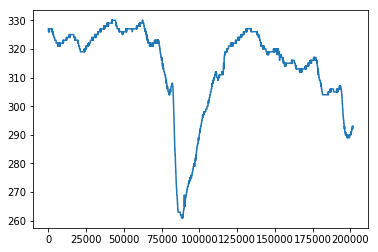

In [9]:
plt.plot(t, GSR_vals)
plt.show()

In [10]:
#Lets get onto extraction of features :->

"""
   1. Mean Skin Resistance
   2. Mean of Deriviative
   3. Mean Differential for Negative Value Only (Mean Decrease Rate During Decay Time)
   4. Proportion of Negative Derivative Samples
   5. Number of Local Minima in the GSR Signal
   6. Average Rising Time of GSR Signal
   7. Spectral Power in [0-2.4]Hz band
   8. Zero Crossing Rate of Skin Conducate Slow Response (SCSR) [0-0.2] Hz
   9. Zero Crossing Rate of skin conductance (SCVSR) [0-0.08] Hz
   10. Mean SCSR
   11. SCVSR Peak Magnitude
"""

'\n   1. Mean Skin Resistance\n   2. Mean of Deriviative\n   3. Mean Differential for Negative Value Only (Mean Decrease Rate During Decay Time)\n   4. Proportion of Negative Derivative Samples\n   5. Number of Local Minima in the GSR Signal\n   6. Average Rising Time of GSR Signal\n   7. Spectral Power in [0-2.4]Hz band\n   8. Zero Crossing Rate of Skin Conducate Slow Response (SCSR) [0-0.2] Hz\n   9. Zero Crossing Rate of skin conductance (SCVSR) [0-0.08] Hz\n   10. Mean SCSR\n   11. SCVSR Peak Magnitude\n'

In [11]:
mean_skin_res = np.mean(GSR_vals) 
mean_skin_res = 1/mean_skin_res #1.
der = (np.diff(GSR_vals)/np.diff(t))*1000
t_new = t[1:]
double_der = (np.diff(der)/np.diff(t_new))*1000
mean_der = np.mean(der) #2.
neg_der = np.array([])
for el in der:
    if el < 0:
        neg_der = np.append(neg_der, el)
neg_mean_der = np.mean(neg_der) #3.
prop_der = np.shape(neg_der)[0]/np.shape(der)[0] #4.
num_min = np.shape(argrelextrema(np.array(GSR_vals), np.less))[1] #5.
avg_rising_t = avg_rising(GSR_vals, t) #6.
freq, spectral_power = find_spectral_pow(GSR_vals, t) #7.
normalized_GSR_vals = (GSR_vals-np.amin(GSR_vals))/(np.amax(GSR_vals) - np.amin(GSR_vals)) #Normalized Data for SCSR, SCVSR
SCSR = get_SCSR(normalized_GSR_vals, t)
SCVSR = get_SCVSR(normalized_GSR_vals, t)
zcr_SCSR = ft.zero_crossing_rate(SCSR) #8.
zcr_SCVSR = ft.zero_crossing_rate(SCVSR) #9.
Mean_SCSR = np.mean(SCSR) #10.
Peak_SCVSR = np.amax(SCVSR) #11.

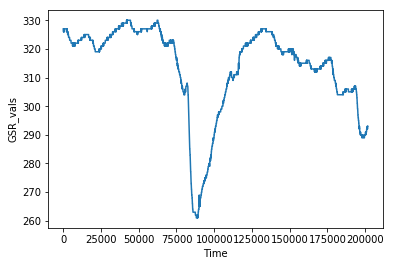

In [12]:
plt.xlabel("Time")
plt.ylabel("GSR_vals")
plt.plot(t, GSR_vals)



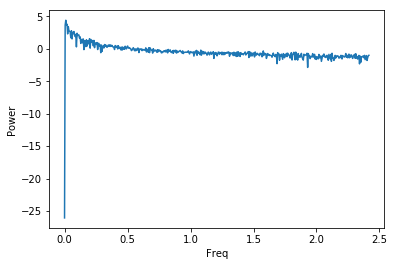

In [13]:
plt.xlabel("Freq")
plt.ylabel("Power")
plt.plot(freq, spectral_power)

In [17]:
print(zcr_SCSR)

[[0.         0.         0.00097656 0.00097656 0.00097656 0.00097656
  0.         0.        ]]


In [18]:
print(zcr_SCVSR)

[[0. 0. 0. 0. 0. 0. 0. 0.]]


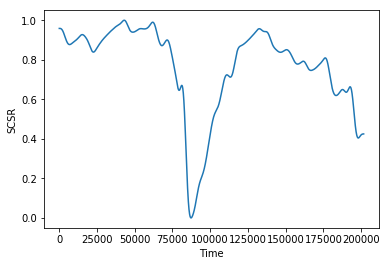

In [19]:
plt.xlabel("Time")
plt.ylabel("SCSR")
plt.plot(t, SCSR)

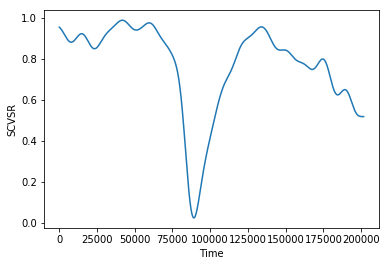

In [20]:
plt.xlabel("Time")
plt.ylabel("SCVSR")
plt.plot(t, SCVSR)